In [48]:
import pandas as pd
import torch
import random
from d2l import torch as d2l

In [3]:
ray = pd.read_excel('Raw.xlsx', sheet_name='RAY Index daily return')

In [5]:
df_raw = pd.read_excel('Raw.xlsx', sheet_name='Daily Return Raw Data')

In [6]:
clean = pd.read_excel('Raw.xlsx', sheet_name='Clean Reblancing')

In [7]:
sector = pd.read_excel('Raw.xlsx', sheet_name='Sector Weight')

In [13]:
# df_raw

In [12]:
af = df_raw.iloc[26:,1::2]
af 

,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,AAWW US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
26,2.3204,-2.4434,1.8491,1.7288,0.6898,0.7062,2.5957,-1.0695,2.7165,-0.4592,...,-0.0502,-0.4703,7.8897,2.0454,5.4949,-0.7225,2.0801,1.2633,0.3716,-8
27,-1.0973,3.3598,-1.5767,0,0.1036,-0.187,-1.9301,0,-1.5702,0.205,...,-6.4792,-5.799,-5.9013,4.1654,-0.8279,-0.1747,0.3774,0.5988,2.1749,0
28,-4.2995,7.0922,-0.3883,-0.6312,-2.1168,-0.3279,1.5426,0,-4.1142,-0.9207,...,-6.0687,9.9407,0.9094,-0.8419,-0.3478,-1.2832,0.3008,-1.3393,-0.3623,2.1739
29,2.0914,4.6358,1.9493,-0.5131,0.4228,0.094,-0.2619,1.1892,-0.7005,1.4455,...,2.916,-2.0324,-3.5229,-3.1837,-2.164,2.0975,-1.6492,-3.3685,0.1364,1.0638
30,-0.9105,-0.7911,-1.1472,0.221,-0.8824,1.1268,1.3918,-1.1752,-3.351,-2.0356,...,0,5.7578,-4.4523,4.1967,-2.8898,-1.36,1.2195,0.7284,-1.044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,-3.5532,NaN,0.0563,-5.5345,0.5861,NaN,NaN,0.2978,-0.1286,0.3967,...,-1.2668,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3424,1.6799,NaN,-2.2668,3.4319,0.1942,NaN,NaN,1.3248,-0.3286,-0.2854,...,2.1294,NaN,NaN,NaN,NaN,NaN,1.3312,NaN,NaN,NaN
3425,-1.5942,NaN,-5.8824,-1.4161,-0.1454,NaN,NaN,0.4283,-1.3367,0.3082,...,1.3633,NaN,NaN,NaN,NaN,NaN,-1.629,NaN,NaN,NaN
3426,0.6186,NaN,-3.6224,0.4084,1.345,NaN,NaN,1.7059,1.9239,0.0878,...,0.5802,NaN,NaN,NaN,NaN,NaN,-0.0534,NaN,NaN,NaN


In [27]:
bf = df_raw.iloc[26:,:]
bf 

,Ticker,AA US Equity R,Ticker.1,AAN US Equity,Ticker.2,AAON US Equity,Ticker.3,AAP US Equity,Ticker.4,AAPL US Equity,...,Ticker.2487,ZTS US Equity,Ticker.2488,ZUMZ US Equity,Ticker.2489,ZUO US Equity,Ticker.2490,ZWS US Equity,Ticker.2491,ZYXI US Equity
26,2010-02-02 00:00:00,2.3204,2020-12-28 00:00:00,-2.4434,2010-02-02 00:00:00,1.8491,2010-02-02 00:00:00,1.7288,2010-02-02 00:00:00,0.6898,...,2013-03-04 00:00:00,-0.7225,2010-02-02 00:00:00,2.0801,2018-05-10 00:00:00,1.2633,2012-04-27 00:00:00,0.3716,2010-02-02 00:00:00,-8
27,2010-02-03 00:00:00,-1.0973,2020-12-29 00:00:00,3.3598,2010-02-03 00:00:00,-1.5767,2010-02-03 00:00:00,0,2010-02-03 00:00:00,0.1036,...,2013-03-05 00:00:00,-0.1747,2010-02-03 00:00:00,0.3774,2018-05-11 00:00:00,0.5988,2012-04-30 00:00:00,2.1749,2010-02-03 00:00:00,0
28,2010-02-04 00:00:00,-4.2995,2020-12-30 00:00:00,7.0922,2010-02-04 00:00:00,-0.3883,2010-02-04 00:00:00,-0.6312,2010-02-04 00:00:00,-2.1168,...,2013-03-06 00:00:00,-1.2832,2010-02-04 00:00:00,0.3008,2018-05-14 00:00:00,-1.3393,2012-05-01 00:00:00,-0.3623,2010-02-05 00:00:00,2.1739
29,2010-02-05 00:00:00,2.0914,2020-12-31 00:00:00,4.6358,2010-02-05 00:00:00,1.9493,2010-02-05 00:00:00,-0.5131,2010-02-05 00:00:00,0.4228,...,2013-03-07 00:00:00,2.0975,2010-02-05 00:00:00,-1.6492,2018-05-15 00:00:00,-3.3685,2012-05-02 00:00:00,0.1364,2010-02-08 00:00:00,1.0638
30,2010-02-08 00:00:00,-0.9105,2021-01-04 00:00:00,-0.7911,2010-02-08 00:00:00,-1.1472,2010-02-08 00:00:00,0.221,2010-02-08 00:00:00,-0.8824,...,2013-03-08 00:00:00,-1.36,2010-02-08 00:00:00,1.2195,2018-05-16 00:00:00,0.7284,2012-05-03 00:00:00,-1.044,2010-02-09 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,2023-08-02 00:00:00,-3.5532,NaN,NaN,2023-08-02 00:00:00,0.0563,2023-08-02 00:00:00,-5.5345,2023-08-02 00:00:00,0.5861,...,NaN,NaN,2023-08-02 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN
3424,2023-08-03 00:00:00,1.6799,NaN,NaN,2023-08-03 00:00:00,-2.2668,2023-08-03 00:00:00,3.4319,2023-08-03 00:00:00,0.1942,...,NaN,NaN,2023-08-03 00:00:00,1.3312,NaN,NaN,NaN,NaN,NaN,NaN
3425,2023-08-04 00:00:00,-1.5942,NaN,NaN,2023-08-04 00:00:00,-5.8824,2023-08-04 00:00:00,-1.4161,2023-08-04 00:00:00,-0.1454,...,NaN,NaN,2023-08-04 00:00:00,-1.629,NaN,NaN,NaN,NaN,NaN,NaN
3426,2023-08-07 00:00:00,0.6186,NaN,NaN,2023-08-07 00:00:00,-3.6224,2023-08-07 00:00:00,0.4084,2023-08-07 00:00:00,1.345,...,NaN,NaN,2023-08-07 00:00:00,-0.0534,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ray_index_data = ray.copy()

In [17]:
ray_index_data.set_index("Date", inplace=True)

In [18]:
ray_index_data

,Return-Y
Date,
2023-08-08,-0.4849
2023-08-07,0.8227
2023-08-04,-0.4793
2023-08-03,-0.2564
2023-08-02,-1.4279
...,...
2010-01-08,0.3212
2010-01-07,0.4234
2010-01-06,0.1243


In [19]:
column_names = af.columns.tolist()
column_names

['AA US Equity R',
 'AAN US Equity',
 'AAON US Equity',
 'AAP US Equity',
 'AAPL US Equity',
 'AAT US Equity',
 'AAWW US Equity',
 'ABCB US Equity',
 'ABG US Equity',
 'ABM US Equity',
 'ABNB US Equity',
 'ABR US Equity',
 'ABUS US Equity',
 'AC US Equity',
 'ACA US Equity',
 'ACAD US Equity',
 'ACCD US Equity',
 'ACCO US Equity',
 'ACET US Equity',
 'ACGL US Equity',
 'ACHC US Equity',
 'ACHR US Equity',
 'ACI US Equity',
 'ACIW US Equity',
 'ACLS US Equity',
 'ACLX US Equity',
 'ACM US Equity',
 'ACMR US Equity',
 'ACNB US Equity',
 'ACRE US Equity',
 'ACRS US Equity',
 'ACT US Equity',
 'ACVA US Equity',
 'ADBE US Equity',
 'ADC US Equity',
 'ADEA US Equity',
 'ADI US Equity',
 'ADM US Equity',
 'ADMA US Equity',
 'ADNT US Equity',
 'ADP US Equity',
 'ADPT US Equity',
 'ADSK US Equity',
 'ADT US Equity',
 'ADTN US Equity',
 'ADUS US Equity',
 'ADV US Equity',
 'AEE US Equity',
 'AEHR US Equity',
 'AEIS US Equity',
 'AEL US Equity',
 'AEO US Equity',
 'AEP US Equity',
 'AES US Equity

In [20]:
len(column_names)

2492

In [22]:
clean_names = list(clean["Ticker"])

In [24]:
set1 = set(column_names)
set2 = set(clean_names)

In [25]:
set2-set1

{'AA US Equity'}

In [26]:
set1 -set2

{'AA US Equity R',
 'AAWW US Equity',
 'AIMC US Equity',
 'ALBO US Equity',
 'AQUA US Equity',
 'BNFT US Equity',
 'BRMK US Equity',
 'CINC US Equity',
 'COUP US Equity',
 'COWN US Equity',
 'CSII US Equity',
 'CTIC US Equity',
 'CVT US Equity',
 'CYXTQ US Equity',
 'DCT US Equity',
 'DSEY US Equity',
 'EVOP US Equity',
 'FRCB US Equity',
 'HSKA US Equity',
 'IAA US Equity',
 'IMGO US Equity',
 'INDT US Equity',
 'ISEE US Equity',
 'KNBE US Equity',
 'LHCG US Equity',
 'LSI US Equity',
 'MAXR US Equity',
 'MGI US Equity',
 'MNTV US Equity',
 'MYOV US Equity',
 'NESR US Equity',
 'OEC US Equity',
 'ONEM US Equity',
 'OSH US Equity',
 'PAYA US Equity',
 'PDCE US Equity',
 'PFHD US Equity',
 'PGRU US Equity',
 'PLPC US Equity',
 'POSH US Equity',
 'PRVB US Equity',
 'QGEN US Equity',
 'RFP US Equity',
 'ROCC US Equity',
 'RUTH US Equity',
 'RWAY US Equity',
 'RXDX US Equity',
 'SBNY US Equity',
 'SENEB US Equity',
 'SGFY US Equity',
 'SICP US Equity',
 'SIVBQ US Equity',
 'SJI US Equity',

In [32]:
rm65l = list(set1-set2)
rm65l.remove("AA US Equity R")
print(len(rm65l))

65


In [120]:
cf = ray_index_data
num_cols = bf.shape[1]
print(num_cols)

4984


In [121]:
for i in range(0, num_cols, 2):
    print(i)
    new_df = bf.iloc[:, i:i+2]
    new_df.set_index(new_df.columns[0],inplace=True)
    cf = cf.join(new_df)
    

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

In [126]:
cfn = cf.iloc[20:,:]
cfnc = cfn.copy()
cfnc.drop(columns = rm65l,inplace=True)
cfnc

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2010-02-02,1.2710,2.3204,NaN,1.8491,1.7288,0.6898,NaN,-1.0695,2.7165,-0.4592,...,-0.0502,NaN,NaN,NaN,NaN,NaN,2.0801,NaN,NaN,-8
2010-02-03,-0.5332,-1.0973,NaN,-1.5767,0,0.1036,NaN,0,-1.5702,0.205,...,-6.4792,NaN,NaN,NaN,NaN,NaN,0.3774,NaN,NaN,0
2010-02-04,-3.1708,-4.2995,NaN,-0.3883,-0.6312,-2.1168,NaN,0,-4.1142,-0.9207,...,-6.0687,NaN,NaN,NaN,NaN,NaN,0.3008,NaN,NaN,NaN
2010-02-05,0.2942,2.0914,NaN,1.9493,-0.5131,0.4228,NaN,1.1892,-0.7005,1.4455,...,2.916,NaN,NaN,NaN,NaN,NaN,-1.6492,NaN,NaN,2.1739
2010-02-08,-0.8389,-0.9105,NaN,-1.1472,0.221,-0.8824,NaN,-1.1752,-3.351,-2.0356,...,0,NaN,NaN,NaN,NaN,NaN,1.2195,NaN,NaN,1.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.629,0.5545,-0.9615,-2
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.345,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.746,-0.5792,-4.1476,-0.561,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [127]:
cfz = cfnc.copy()
cfz.fillna(0, inplace=True)
cfz

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2010-02-02,1.2710,2.3204,0.0000,1.8491,1.7288,0.6898,0.0000,-1.0695,2.7165,-0.4592,...,-0.0502,0.0000,0.0000,0.0000,0.0000,0.0000,2.0801,0.0000,0.0000,-8.0000
2010-02-03,-0.5332,-1.0973,0.0000,-1.5767,0.0000,0.1036,0.0000,0.0000,-1.5702,0.2050,...,-6.4792,0.0000,0.0000,0.0000,0.0000,0.0000,0.3774,0.0000,0.0000,0.0000
2010-02-04,-3.1708,-4.2995,0.0000,-0.3883,-0.6312,-2.1168,0.0000,0.0000,-4.1142,-0.9207,...,-6.0687,0.0000,0.0000,0.0000,0.0000,0.0000,0.3008,0.0000,0.0000,0.0000
2010-02-05,0.2942,2.0914,0.0000,1.9493,-0.5131,0.4228,0.0000,1.1892,-0.7005,1.4455,...,2.9160,0.0000,0.0000,0.0000,0.0000,0.0000,-1.6492,0.0000,0.0000,2.1739
2010-02-08,-0.8389,-0.9105,0.0000,-1.1472,0.2210,-0.8824,0.0000,-1.1752,-3.3510,-2.0356,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2195,0.0000,0.0000,1.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [128]:
cfnc.to_csv("cfnc.csv")

In [130]:
efn = cfnc.copy()
ef = cfz.copy()

In [131]:
ef

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2010-02-02,1.2710,2.3204,0.0000,1.8491,1.7288,0.6898,0.0000,-1.0695,2.7165,-0.4592,...,-0.0502,0.0000,0.0000,0.0000,0.0000,0.0000,2.0801,0.0000,0.0000,-8.0000
2010-02-03,-0.5332,-1.0973,0.0000,-1.5767,0.0000,0.1036,0.0000,0.0000,-1.5702,0.2050,...,-6.4792,0.0000,0.0000,0.0000,0.0000,0.0000,0.3774,0.0000,0.0000,0.0000
2010-02-04,-3.1708,-4.2995,0.0000,-0.3883,-0.6312,-2.1168,0.0000,0.0000,-4.1142,-0.9207,...,-6.0687,0.0000,0.0000,0.0000,0.0000,0.0000,0.3008,0.0000,0.0000,0.0000
2010-02-05,0.2942,2.0914,0.0000,1.9493,-0.5131,0.4228,0.0000,1.1892,-0.7005,1.4455,...,2.9160,0.0000,0.0000,0.0000,0.0000,0.0000,-1.6492,0.0000,0.0000,2.1739
2010-02-08,-0.8389,-0.9105,0.0000,-1.1472,0.2210,-0.8824,0.0000,-1.1752,-3.3510,-2.0356,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2195,0.0000,0.0000,1.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [132]:
ef5 = ef.iloc[1894:, :]
ef5

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2017-08-08,-0.2412,4.1853,0.0000,-0.1431,-0.0913,0.0976,-1.1392,0.6615,-2.3063,-0.4251,...,0.1093,0.0000,0.0000,0.0000,0.0000,-2.9597,0.7843,0.0000,0.2434,0.0000
2017-08-09,-0.1348,-2.4255,0.0000,-3.1519,-0.1920,-0.2393,0.5010,-1.7525,0.0944,-0.5617,...,-1.1351,0.0000,0.0000,0.0000,0.0000,1.3500,-2.3346,0.0000,-0.8499,0.0000
2017-08-10,-1.4538,-2.1750,0.0000,-1.1834,-2.7936,0.0494,-0.1745,-2.6756,-1.9811,-1.3104,...,-1.8768,0.0000,0.0000,0.0000,0.0000,-1.7596,-3.1873,0.0000,-2.2449,5.3333
2017-08-11,0.1586,0.0000,0.0000,-0.8982,1.1401,0.0000,-0.6991,-0.9164,0.5775,-0.9615,...,-0.7426,0.0000,0.0000,0.0000,0.0000,-0.0167,1.2346,0.0000,-0.5846,2.5316
2017-08-14,1.0465,-1.5617,0.0000,1.8127,1.8446,0.3384,2.2630,4.2775,-0.6699,2.0804,...,1.9950,0.0000,0.0000,0.0000,0.0000,1.6909,-1.6260,0.0000,2.3940,35.8025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [133]:
ef3 = ef.iloc[2627:, :]
ef3

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2020-07-08,0.8498,-1.2467,0.0000,-1.7026,-0.1683,0.1106,-1.9970,-1.3768,7.3253,-2.4542,...,0.4439,0.0000,1.6101,-0.2579,6.1578,0.2673,0.4516,0.3959,0.1059,1.2289
2020-07-09,-0.5957,-5.1398,0.0000,-1.5294,-1.9787,-1.6991,1.6148,-5.2117,-4.1843,-3.0615,...,-3.9141,0.0000,1.2016,-3.3145,5.4282,-0.8141,-4.9082,1.2618,-2.2928,-2.4659
2020-07-10,1.0894,8.4601,0.0000,1.3847,0.5234,2.2816,2.8377,5.7928,4.3557,3.2833,...,5.8147,0.0000,2.3560,-2.7474,-1.5069,-0.4213,1.4578,-3.1931,1.7690,11.1630
2020-07-13,-1.1433,0.8764,0.0000,0.5353,0.5058,0.7182,-2.0971,0.8817,-1.6957,2.0587,...,2.0801,0.0000,-5.6440,-1.7500,-4.4466,0.8826,-1.5922,-6.1947,0.9933,-8.6424
2020-07-14,1.3701,9.5569,0.0000,3.2495,2.5531,1.1745,-0.9019,-3.3579,7.3529,0.5636,...,-2.6156,0.0000,-0.1114,6.7176,2.1016,1.5111,0.8287,-0.0858,3.4422,0.4213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [134]:
ef2 = ef.iloc[2879:, :]
ef2

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2021-07-08,-0.8601,-2.4013,-2.9287,-1.0412,-0.9215,0.6580,-0.9475,-1.5702,0.5269,-0.7692,...,-2.8649,-3.6671,-2.0055,4.8542,-0.3203,-0.2229,-0.7773,-0.5721,-1.7640,-1.5800
2021-07-09,1.2511,5.8824,3.2518,0.7014,2.8722,0.5542,3.2796,4.6180,2.6374,1.2450,...,4.9157,4.0205,-0.2409,3.9738,0.2729,0.2742,4.1076,1.4384,4.0303,-1.2709
2021-07-12,0.2604,-0.4006,0.4870,-0.8073,-0.7214,-0.4240,0.6616,-0.0602,2.9649,2.6450,...,0.5737,3.4951,-1.5477,-2.8855,0.0790,0.4203,-0.3051,-1.1912,1.5535,-1.0163
2021-07-13,-0.5622,-4.4784,-5.0081,-1.8193,-1.3967,-0.4542,-2.8654,-2.5497,0.9012,-0.3165,...,-2.2438,-0.7946,-0.1926,-3.8174,-0.3465,0.4941,-3.6720,-0.0574,-2.0774,-0.4791
2021-07-14,-0.1377,-1.3476,-2.2789,-0.4876,0.5695,-0.3279,0.8119,-1.4833,-0.2220,2.1769,...,-0.0973,-0.2403,-4.6989,-4.1735,-1.1753,0.9884,-2.6048,-3.1591,-1.0029,-1.8569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [135]:
def get_feature_label(df):
    ff = df.iloc[:,1:]
    labels = torch.tensor(df[['Return-Y']].values)
    features = torch.tensor(ff.values)
    return features, labels

In [136]:
features5year, labels5year = get_feature_label(ef5)
features3year, labels3year = get_feature_label(ef3)
features2year, labels2year = get_feature_label(ef2)

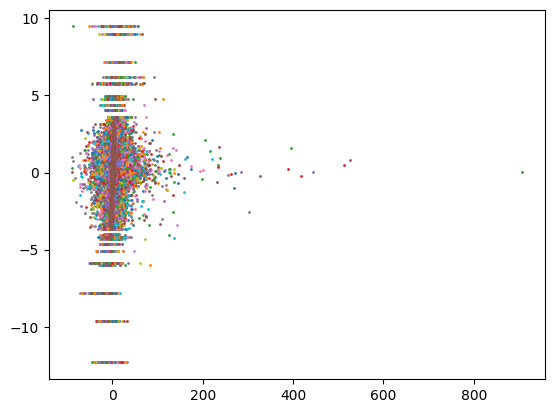

In [137]:
for i in range(2426):
    d2l.plt.scatter(features5year[:, i].detach(), labels5year.detach().numpy(), 1)

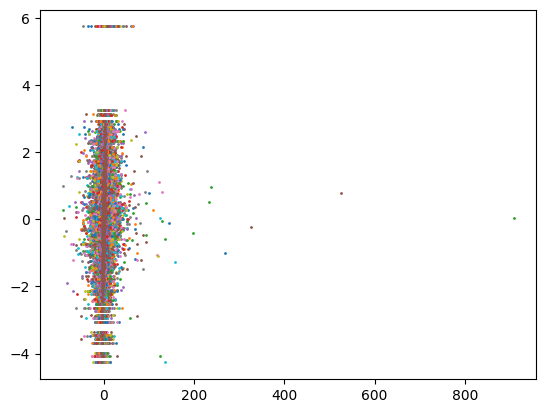

In [138]:
for i in range(2426):
    d2l.plt.scatter(features2year[:, i].detach(), labels2year.detach().numpy(), 1)

In [139]:
gf = ef.copy()
gf

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2010-02-02,1.2710,2.3204,0.0000,1.8491,1.7288,0.6898,0.0000,-1.0695,2.7165,-0.4592,...,-0.0502,0.0000,0.0000,0.0000,0.0000,0.0000,2.0801,0.0000,0.0000,-8.0000
2010-02-03,-0.5332,-1.0973,0.0000,-1.5767,0.0000,0.1036,0.0000,0.0000,-1.5702,0.2050,...,-6.4792,0.0000,0.0000,0.0000,0.0000,0.0000,0.3774,0.0000,0.0000,0.0000
2010-02-04,-3.1708,-4.2995,0.0000,-0.3883,-0.6312,-2.1168,0.0000,0.0000,-4.1142,-0.9207,...,-6.0687,0.0000,0.0000,0.0000,0.0000,0.0000,0.3008,0.0000,0.0000,0.0000
2010-02-05,0.2942,2.0914,0.0000,1.9493,-0.5131,0.4228,0.0000,1.1892,-0.7005,1.4455,...,2.9160,0.0000,0.0000,0.0000,0.0000,0.0000,-1.6492,0.0000,0.0000,2.1739
2010-02-08,-0.8389,-0.9105,0.0000,-1.1472,0.2210,-0.8824,0.0000,-1.1752,-3.3510,-2.0356,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2195,0.0000,0.0000,1.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0.0000,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0.0000,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.6290,0.5545,-0.9615,-2.0000
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.3450,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.7460,-0.5792,-4.1476,-0.5610,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [140]:
efn

,Return-Y,AA US Equity R,AAN US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,AAT US Equity,ABCB US Equity,ABG US Equity,ABM US Equity,...,ZION US Equity,ZIP US Equity,ZM US Equity,ZNTL US Equity,ZS US Equity,ZTS US Equity,ZUMZ US Equity,ZUO US Equity,ZWS US Equity,ZYXI US Equity
2010-02-02,1.2710,2.3204,NaN,1.8491,1.7288,0.6898,NaN,-1.0695,2.7165,-0.4592,...,-0.0502,NaN,NaN,NaN,NaN,NaN,2.0801,NaN,NaN,-8
2010-02-03,-0.5332,-1.0973,NaN,-1.5767,0,0.1036,NaN,0,-1.5702,0.205,...,-6.4792,NaN,NaN,NaN,NaN,NaN,0.3774,NaN,NaN,0
2010-02-04,-3.1708,-4.2995,NaN,-0.3883,-0.6312,-2.1168,NaN,0,-4.1142,-0.9207,...,-6.0687,NaN,NaN,NaN,NaN,NaN,0.3008,NaN,NaN,NaN
2010-02-05,0.2942,2.0914,NaN,1.9493,-0.5131,0.4228,NaN,1.1892,-0.7005,1.4455,...,2.916,NaN,NaN,NaN,NaN,NaN,-1.6492,NaN,NaN,2.1739
2010-02-08,-0.8389,-0.9105,NaN,-1.1472,0.221,-0.8824,NaN,-1.1752,-3.351,-2.0356,...,0,NaN,NaN,NaN,NaN,NaN,1.2195,NaN,NaN,1.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,-1.4279,-3.5532,-1.0431,0.0563,-5.5345,0.5861,0.3153,0.2978,-0.1286,0.3967,...,-1.2668,-4.0344,-4.1421,-0.5333,-7.5307,-1.8921,0,-9.1837,-0.0987,-3.8283
2023-08-03,-0.2564,1.6799,-7.5896,-2.2668,3.4319,0.1942,0.1796,1.3248,-0.3286,-0.2854,...,2.1294,0.5045,0,0.0766,0.1528,-0.6154,1.3312,1.3109,-0.7242,2.5332
2023-08-04,-0.4793,-1.5942,3.4221,-5.8824,-1.4161,-0.1454,0.8516,0.4283,-1.3367,0.3082,...,1.3633,-0.1115,-1.1876,0.5741,-3.0576,-1.2439,-1.629,0.5545,-0.9615,-2
2023-08-07,0.8227,0.6186,0.6618,-3.6224,0.4084,1.345,2.0444,1.7059,1.9239,0.0878,...,0.5802,-4.746,-0.5792,-4.1476,-0.561,1.1532,-0.0534,-0.9191,1.3391,-3.6014


In [150]:
def move_noise(df,nf,deviation_range):
    ff = df.copy()
    medians = nf.median()
    # deviation_range = 10
    outlier_range = 1000
    for column in df.columns[1:]:
        is_outlier = (df[column] < (medians[column] - deviation_range)) | (df[column] > (medians[column] + deviation_range))
        # is_outlier = (zf[column] < (medians[column] - outlier_range*abs(medians[column]))) | (zf[column] > (medians[column] + outlier_range*abs(medians[column])))
        # print(is_outlier)
        print(ff.loc[is_outlier, column],column,"+++++++++++++++++ans",medians[column])
        ff.loc[is_outlier, column] = medians[column]
    return ff

In [151]:
hf = move_noise(gf,efn,50)

Series([], Name: AA US Equity R, dtype: float64) AA US Equity R +++++++++++++++++ans 0.0
Series([], Name: AAN US Equity, dtype: float64) AAN US Equity +++++++++++++++++ans 0.0717
Series([], Name: AAON US Equity, dtype: float64) AAON US Equity +++++++++++++++++ans 0.09495
Series([], Name: AAP US Equity, dtype: float64) AAP US Equity +++++++++++++++++ans 0.0468
Series([], Name: AAPL US Equity, dtype: float64) AAPL US Equity +++++++++++++++++ans 0.04825
Series([], Name: AAT US Equity, dtype: float64) AAT US Equity +++++++++++++++++ans 0.0499
Series([], Name: ABCB US Equity, dtype: float64) ABCB US Equity +++++++++++++++++ans 0.0
Series([], Name: ABG US Equity, dtype: float64) ABG US Equity +++++++++++++++++ans 0.11095
Series([], Name: ABM US Equity, dtype: float64) ABM US Equity +++++++++++++++++ans 0.06575
Series([], Name: ABNB US Equity, dtype: float64) ABNB US Equity +++++++++++++++++ans -0.025750000000000002
Series([], Name: ABR US Equity, dtype: float64) ABR US Equity +++++++++++++++

In [155]:
hf2 = hf.iloc[2879:, :]
hf3 = hf.iloc[2627:, :]
hf5 = hf.iloc[1894:, :]

In [156]:
f5year, l5year = get_feature_label(hf5)
f3year, l3year = get_feature_label(hf3)
f2year, l2year = get_feature_label(hf2)

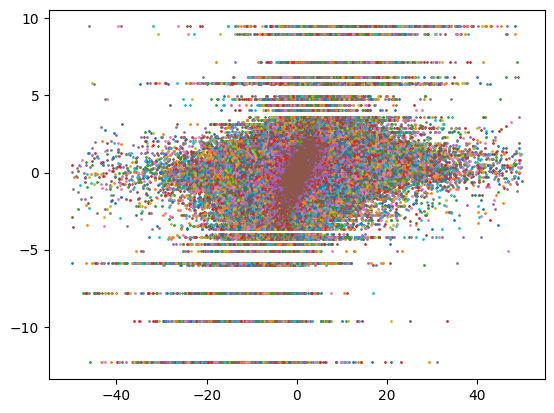

In [157]:
for i in range(2426):
    d2l.plt.scatter(f5year[:, i].detach(), l5year.detach().numpy(), 1)

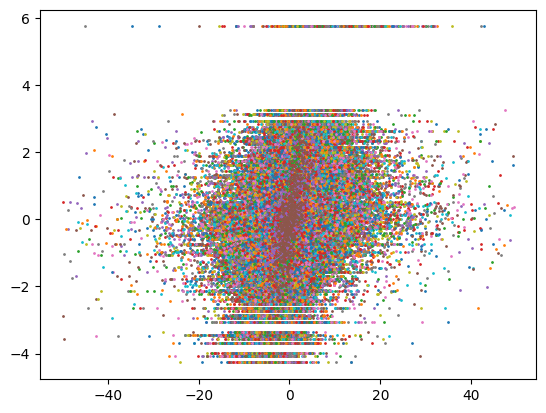

In [158]:
for i in range(2426):
    d2l.plt.scatter(f2year[:, i].detach(), l2year.detach().numpy(), 1)

In [197]:
def linreg(X, w):
    return torch.matmul(X, w)
def squared_loss(y_hat, y): 
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [207]:
def main(features,labels,w):
    lr = 0.0003
    num_epochs = 6
    net = linreg
    loss = squared_loss
    batch_size = 10
    percent_range = 0.10  # 正负百分之十的范围
    initial_w = w.clone().detach() 
    lower_bound = initial_w * (1 - percent_range)
    upper_bound = initial_w * (1 + percent_range)
    # print("lower",lower_bound[:2])
    # print("uper",upper_bound[:2])
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
        # print("X", X.shape, w2.shape)
            l = loss(net(X, w), y)  
            l.sum().backward()
            sgd([w], lr, batch_size)  
            with torch.no_grad():
                w.data = torch.max(torch.min(w,upper_bound), lower_bound).data
                # w.clamp_(min=0)
                w /= w.sum()
                
            # print("归一后",w2.data[:2])
            # w2 = torch.min(w2, upper_bound) 
        with torch.no_grad():
            train_l = loss(net(features, w), labels)
            sq = torch.sqrt((net(features, w)-labels)**2)
            print(f'epoch {epoch + 1}, RMSE {float(sq.mean()):f}')
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
    print(w)

In [208]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)

In [209]:
w5 = w.clone()

In [214]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(features5year,labels5year,w)

epoch 1, RMSE 0.507946
epoch 1, loss 0.243367
epoch 2, RMSE 0.508320
epoch 2, loss 0.243675
epoch 3, RMSE 0.505878
epoch 3, loss 0.241113
epoch 4, RMSE 0.508061
epoch 4, loss 0.243510
epoch 5, RMSE 0.505501
epoch 5, loss 0.240953
epoch 6, RMSE 0.505499
epoch 6, loss 0.241104
tensor([[1.0492e-01],
        [4.0296e-02],
        [2.6925e-02],
        ...,
        [4.4402e-07],
        [2.9342e-07],
        [2.5616e-07]], dtype=torch.float64, requires_grad=True)


In [202]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(features3year,labels3year,w)

epoch 1, RMSE 0.598242
epoch 1, loss 0.298241
epoch 2, RMSE 0.594008
epoch 2, loss 0.294440
epoch 3, RMSE 0.600833
epoch 3, loss 0.301833
epoch 4, RMSE 0.601486
epoch 4, loss 0.301697
epoch 5, RMSE 0.593525
epoch 5, loss 0.293921
epoch 6, RMSE 0.594695
epoch 6, loss 0.294407
epoch 7, RMSE 0.599285
epoch 7, loss 0.299797
epoch 8, RMSE 0.593177
epoch 8, loss 0.292282
epoch 9, RMSE 0.592337
epoch 9, loss 0.291064
epoch 10, RMSE 0.597832
epoch 10, loss 0.296835
epoch 11, RMSE 0.594778
epoch 11, loss 0.294315
epoch 12, RMSE 0.599559
epoch 12, loss 0.298493
epoch 13, RMSE 0.598637
epoch 13, loss 0.297083
epoch 14, RMSE 0.599059
epoch 14, loss 0.299167
epoch 15, RMSE 0.597025
epoch 15, loss 0.297395
epoch 16, RMSE 0.598750
epoch 16, loss 0.299358
epoch 17, RMSE 0.599406
epoch 17, loss 0.299230
epoch 18, RMSE 0.592604
epoch 18, loss 0.292167
epoch 19, RMSE 0.600311
epoch 19, loss 0.300616
epoch 20, RMSE 0.594717
epoch 20, loss 0.295544
epoch 21, RMSE 0.595882
epoch 21, loss 0.294495
epoch 22, 

In [203]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(features2year,labels2year,w)

epoch 1, RMSE 0.567945
epoch 1, loss 0.264146
epoch 2, RMSE 0.564180
epoch 2, loss 0.260729
epoch 3, RMSE 0.566603
epoch 3, loss 0.262807
epoch 4, RMSE 0.563098
epoch 4, loss 0.259652
epoch 5, RMSE 0.568832
epoch 5, loss 0.264677
epoch 6, RMSE 0.568627
epoch 6, loss 0.264166
epoch 7, RMSE 0.566412
epoch 7, loss 0.262603
epoch 8, RMSE 0.566848
epoch 8, loss 0.263060
epoch 9, RMSE 0.565385
epoch 9, loss 0.261859
epoch 10, RMSE 0.565695
epoch 10, loss 0.261936
epoch 11, RMSE 0.557667
epoch 11, loss 0.254607
epoch 12, RMSE 0.564876
epoch 12, loss 0.261336
epoch 13, RMSE 0.565104
epoch 13, loss 0.261215
epoch 14, RMSE 0.564954
epoch 14, loss 0.261358
epoch 15, RMSE 0.560528
epoch 15, loss 0.257098
epoch 16, RMSE 0.568741
epoch 16, loss 0.264774
epoch 17, RMSE 0.566137
epoch 17, loss 0.262522
epoch 18, RMSE 0.562711
epoch 18, loss 0.259440
epoch 19, RMSE 0.560307
epoch 19, loss 0.257147
epoch 20, RMSE 0.571053
epoch 20, loss 0.266187
epoch 21, RMSE 0.565048
epoch 21, loss 0.261581
epoch 22, 

In [204]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(f5year,l5year,w)

epoch 1, RMSE 0.494195
epoch 1, loss 0.231132
epoch 2, RMSE 0.508957
epoch 2, loss 0.243156
epoch 3, RMSE 0.505440
epoch 3, loss 0.239406
epoch 4, RMSE 0.503124
epoch 4, loss 0.238741
epoch 5, RMSE 0.499999
epoch 5, loss 0.235596
epoch 6, RMSE 0.504127
epoch 6, loss 0.238522
epoch 7, RMSE 0.502553
epoch 7, loss 0.237311
epoch 8, RMSE 0.495539
epoch 8, loss 0.231245
epoch 9, RMSE 0.506602
epoch 9, loss 0.240948
epoch 10, RMSE 0.501834
epoch 10, loss 0.236751
epoch 11, RMSE 0.505595
epoch 11, loss 0.240374
epoch 12, RMSE 0.507633
epoch 12, loss 0.242177
epoch 13, RMSE 0.508767
epoch 13, loss 0.243092
epoch 14, RMSE 0.500496
epoch 14, loss 0.236416
epoch 15, RMSE 0.504696
epoch 15, loss 0.239855
epoch 16, RMSE 0.511656
epoch 16, loss 0.245201
epoch 17, RMSE 0.507846
epoch 17, loss 0.242213
epoch 18, RMSE 0.508313
epoch 18, loss 0.242701
epoch 19, RMSE 0.503667
epoch 19, loss 0.238496
epoch 20, RMSE 0.508008
epoch 20, loss 0.242321
epoch 21, RMSE 0.506706
epoch 21, loss 0.241508
epoch 22, 

In [205]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(f3year,l3year,w)

epoch 1, RMSE 0.595253
epoch 1, loss 0.295316
epoch 2, RMSE 0.595846
epoch 2, loss 0.295157
epoch 3, RMSE 0.587327
epoch 3, loss 0.286708
epoch 4, RMSE 0.593625
epoch 4, loss 0.293631
epoch 5, RMSE 0.595864
epoch 5, loss 0.295232
epoch 6, RMSE 0.597710
epoch 6, loss 0.296823
epoch 7, RMSE 0.594499
epoch 7, loss 0.293301
epoch 8, RMSE 0.597052
epoch 8, loss 0.296674
epoch 9, RMSE 0.594583
epoch 9, loss 0.293724
epoch 10, RMSE 0.599165
epoch 10, loss 0.298168
epoch 11, RMSE 0.593165
epoch 11, loss 0.292291
epoch 12, RMSE 0.589623
epoch 12, loss 0.287568
epoch 13, RMSE 0.596161
epoch 13, loss 0.294555
epoch 14, RMSE 0.599061
epoch 14, loss 0.297160
epoch 15, RMSE 0.597547
epoch 15, loss 0.296971
epoch 16, RMSE 0.595856
epoch 16, loss 0.294600
epoch 17, RMSE 0.593448
epoch 17, loss 0.293016
epoch 18, RMSE 0.595073
epoch 18, loss 0.294651
epoch 19, RMSE 0.589077
epoch 19, loss 0.288081
epoch 20, RMSE 0.594640
epoch 20, loss 0.294149
epoch 21, RMSE 0.599248
epoch 21, loss 0.298208
epoch 22, 

In [206]:
w = torch.tensor(clean[["Rebalance Weight"]].values[:]/100, requires_grad=True)
main(f2year,l2year,w)

epoch 1, RMSE 0.561219
epoch 1, loss 0.257405
epoch 2, RMSE 0.558279
epoch 2, loss 0.254775
epoch 3, RMSE 0.565679
epoch 3, loss 0.261535
epoch 4, RMSE 0.562304
epoch 4, loss 0.258153
epoch 5, RMSE 0.565922
epoch 5, loss 0.261671
epoch 6, RMSE 0.567908
epoch 6, loss 0.263354
epoch 7, RMSE 0.567912
epoch 7, loss 0.263310
epoch 8, RMSE 0.560726
epoch 8, loss 0.256868
epoch 9, RMSE 0.561245
epoch 9, loss 0.257435
epoch 10, RMSE 0.567114
epoch 10, loss 0.262687
epoch 11, RMSE 0.564307
epoch 11, loss 0.259973
epoch 12, RMSE 0.564442
epoch 12, loss 0.260194
epoch 13, RMSE 0.567094
epoch 13, loss 0.262671
epoch 14, RMSE 0.561972
epoch 14, loss 0.258251
epoch 15, RMSE 0.564476
epoch 15, loss 0.260462
epoch 16, RMSE 0.566829
epoch 16, loss 0.262552
epoch 17, RMSE 0.566033
epoch 17, loss 0.261340
epoch 18, RMSE 0.565782
epoch 18, loss 0.261274
epoch 19, RMSE 0.566491
epoch 19, loss 0.261832
epoch 20, RMSE 0.567464
epoch 20, loss 0.263040
epoch 21, RMSE 0.563961
epoch 21, loss 0.259898
epoch 22, 